In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

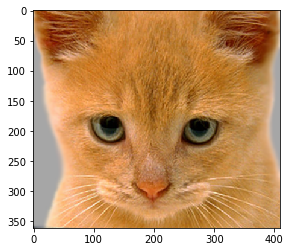

In [3]:
cat_img = cv2.imread('cat.bmp')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
plt.imshow(cat_img)

**高斯分布函数**

$\frac{1}{2\pi \delta ^2}e\tfrac{-((x-x_{0})^2+(y-y_{0})^2)}{2\delta ^2}$

In [15]:
kernel_size = 9
sigma = 1
def gassian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float)
    centre = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            d = (i - centre)**2 + (j - centre)**2
            kernel[i, j] = np.exp(-d/(2*sigma**2))
    #kernel /= (2 * np.pi * sigma**2)
    kernel /= kernel.sum() # 归一化
    return kernel

kernel = gassian_kernel(kernel_size, sigma)
kernel

array([[1.79106361e-08, 5.93118809e-07, 7.22566631e-06, 3.23831897e-05,
        5.33908537e-05, 3.23831897e-05, 7.22566631e-06, 5.93118809e-07,
        1.79106361e-08],
       [5.93118809e-07, 1.96413974e-05, 2.39281205e-04, 1.07238396e-03,
        1.76806225e-03, 1.07238396e-03, 2.39281205e-04, 1.96413974e-05,
        5.93118809e-07],
       [7.22566631e-06, 2.39281205e-04, 2.91504184e-03, 1.30643112e-02,
        2.15394077e-02, 1.30643112e-02, 2.91504184e-03, 2.39281205e-04,
        7.22566631e-06],
       [3.23831897e-05, 1.07238396e-03, 1.30643112e-02, 5.85501805e-02,
        9.65329280e-02, 5.85501805e-02, 1.30643112e-02, 1.07238396e-03,
        3.23831897e-05],
       [5.33908537e-05, 1.76806225e-03, 2.15394077e-02, 9.65329280e-02,
        1.59155892e-01, 9.65329280e-02, 2.15394077e-02, 1.76806225e-03,
        5.33908537e-05],
       [3.23831897e-05, 1.07238396e-03, 1.30643112e-02, 5.85501805e-02,
        9.65329280e-02, 5.85501805e-02, 1.30643112e-02, 1.07238396e-03,
        3.2

(361, 410, 3)
410 361
9
4
range(4, 406)
(361, 410, 3)


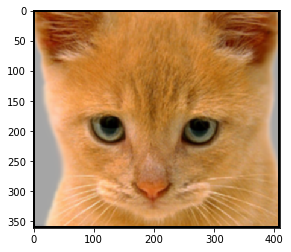

In [16]:
def convolution(img, kernel):
    img_h, img_w = img.shape[:2]
    print(img.shape)
    print(img_w,img_h)
    print(kernel.shape[0])
    bored = int(kernel.shape[0] / 2)
    print(bored)
    new_img = np.zeros((img_h, img_w, 3), dtype=np.float)
    print(range(bored, img_w - bored))
    for c in range(3):
        for x in range(bored, img_w - bored):
            for y in range(bored, img_h - bored):
                new_img[y, x, c] = np.sum(kernel * img[y-bored:y+bored+1, x-bored:x+bored+1, c])
    new_img = np.clip(new_img, 0, 255)
    new_img = new_img.astype(np.uint8)
    return new_img
img = convolution(cat_img, kernel)
print(img.shape)
plt.imshow(img)

In [ ]:
def add_padding(img, kernel_size):
    p = kernel_size//2 
    black = [0, 0, 0]
    padding_img = cv2.copyMakeBorder(img, p, p, p, p, cv2.BORDER_CONSTANT, value=black )
    return padding_img
img = convolution(add_padding(cat_img, kernel_size), kernel)
print(img.shape)
plt.imshow(img)